In [17]:
import pandas as pd

df = pd.read_excel("all indices.xlsx", sheet_name="winter")

In [19]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  428 non-null    object 
 1   RARSa    428 non-null    float64
 2   RARSb    428 non-null    float64
 3   NDVI705  428 non-null    float64
 4   PSSRa    428 non-null    float64
 5   PSSRb    428 non-null    float64
 6   PSNDa    428 non-null    float64
 7   PSNDb    428 non-null    float64
 8   YI       428 non-null    float64
 9   mSR      428 non-null    float64
 10  mNDI     428 non-null    float64
 11  DD       428 non-null    float64
 12  RES      428 non-null    float64
 13  RARSc    428 non-null    float64
 14  SIPI     428 non-null    float64
 15  PSSRc    428 non-null    float64
 16  PRI      428 non-null    float64
 17  CARI     428 non-null    float64
 18  MSI      428 non-null    float64
 19  WI       428 non-null    float64
 20  TM5TM7   428 non-null    float64
 21  NDVIa    428 non

,RARSa,RARSb,NDVI705,PSSRa,PSSRb,PSNDa,PSNDb,YI,mSR,mNDI,...,TBRIa,TBRIb,NDWIa,NDWIb,NDWIc,WABIa,WABIb,WABIc,NDlma,NDMI
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.468050,0.041056,0.375749,6.543619,5.620592,0.723548,0.687565,-0.006906,1.258882,0.515831,...,0.997830,0.959009,0.489350,0.204381,0.488721,0.020711,0.023039,-0.047695,0.102606,0.000282
std,0.082534,0.013888,0.061755,1.628837,1.258628,0.054434,0.056356,0.003506,0.233652,0.080882,...,0.018573,0.009610,0.055917,0.037774,0.065589,0.109667,0.107498,0.110777,0.023192,0.003947
min,0.260412,0.015435,0.217123,3.620865,3.185210,0.567181,0.522127,-0.016645,0.723277,0.291654,...,0.939928,0.914699,0.312483,0.101039,0.294296,-0.357003,-0.346863,-0.425715,0.054411,-0.010110
25%,0.416332,0.031901,0.332685,5.392493,4.747126,0.687133,0.652000,-0.009161,1.093015,0.459734,...,0.984201,0.954977,0.452495,0.178012,0.445208,-0.042941,-0.038438,-0.110185,0.086967,-0.002431
50%,0.480210,0.037874,0.370879,6.157062,5.470272,0.720556,0.690893,-0.007350,1.237893,0.520048,...,0.994599,0.960702,0.483394,0.202421,0.486036,0.033578,0.035918,-0.036411,0.099846,0.000183
75%,0.528525,0.047970,0.420837,7.395219,6.387661,0.761769,0.729278,-0.005534,1.418917,0.577540,...,1.011069,0.965740,0.524659,0.226164,0.523068,0.088911,0.092990,0.023270,0.115194,0.002884
max,0.649728,0.167071,0.525403,12.239014,10.427906,0.848931,0.824990,0.009570,1.912162,0.680537,...,1.038022,0.978195,0.687975,0.334639,0.741952,0.309083,0.315830,0.251761,0.190362,0.012492


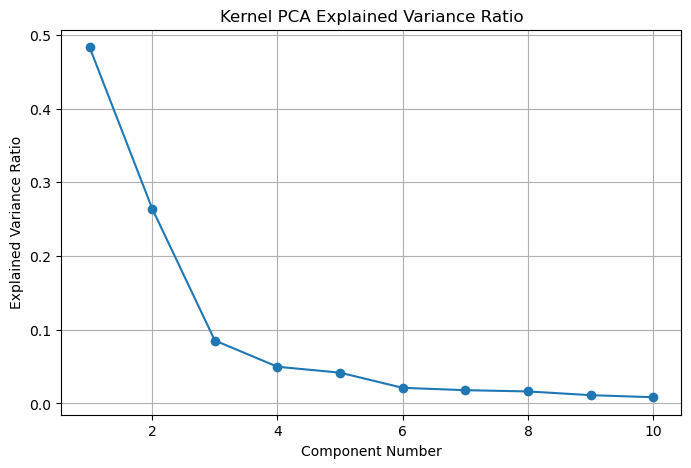

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Extract only the numeric columns (the indices)
X = df.drop("species", axis=1)  # Features

# -------------------
# 1. Kernel PCA
# -------------------

# Initialize Kernel PCA
kpca = KernelPCA(n_components=10, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X)

# Calculate explained variance ratio manually
# Compute variance of each component
explained_variance = np.var(X_kpca, axis=0)
total_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance / total_variance

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), 
         explained_variance_ratio, marker='o', linestyle='-')
plt.title("Kernel PCA Explained Variance Ratio")
plt.xlabel("Component Number")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

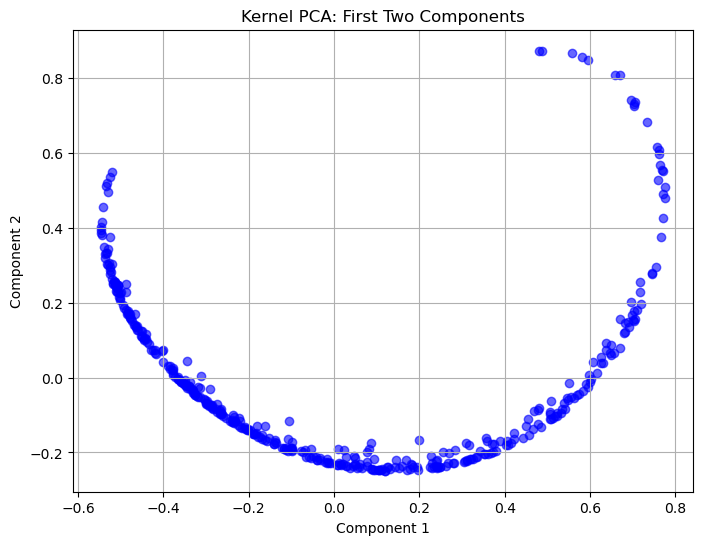

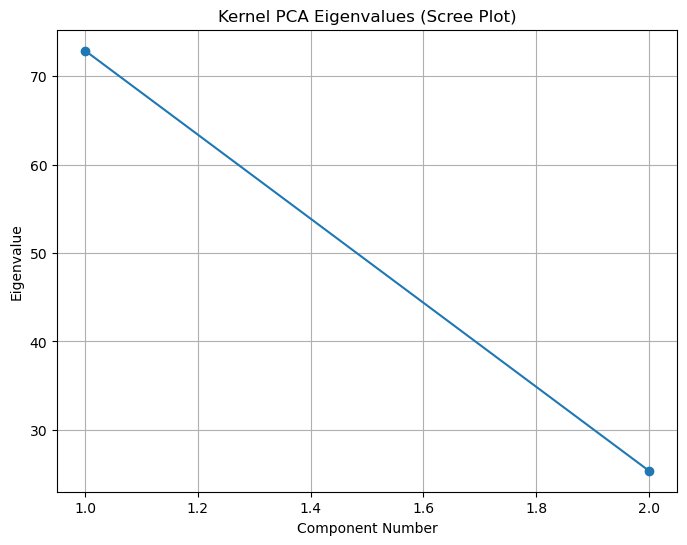

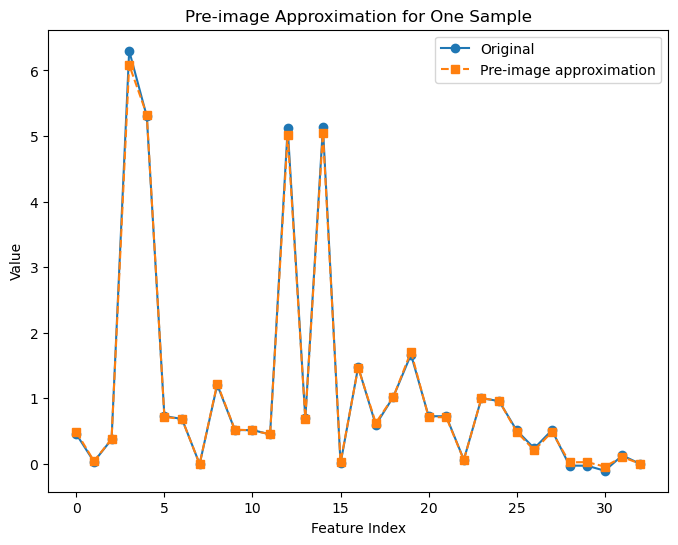

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

X = df.drop("species", axis=1)  # Features
X_numpy = X.to_numpy()  # Convert DataFrame to numpy array

# Initialize KernelPCA with fit_inverse_transform=True
kpca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True)
# Fit and transform the data
X_kpca = kpca.fit_transform(X_numpy)

# --------------------------
# 2. Scatter Plot of the Transformed Data
# --------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='blue', alpha=0.6)
plt.title("Kernel PCA: First Two Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

# --------------------------
# 3. Scree Plot (Eigenvalues)
# --------------------------
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(kpca.eigenvalues_) + 1), kpca.eigenvalues_, marker='o', linestyle='-')
plt.title("Kernel PCA Eigenvalues (Scree Plot)")
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

# --------------------------
# 4. Pre-image Reconstruction (Approximate)
# --------------------------
# Now inverse_transform will work because we set fit_inverse_transform=True
approx_preimage = kpca.inverse_transform(X_kpca)
# Compare the original and pre-image for the first sample
plt.figure(figsize=(8, 6))
plt.plot(X_numpy[0], 'o-', label='Original')  # Using numpy array instead of DataFrame
plt.plot(approx_preimage[0], 's--', label='Pre-image approximation')
plt.title("Pre-image Approximation for One Sample")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.show()

In [46]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder

# Example: suppose your DataFrame 'df' has 21 columns: 
# one 'species' column and 20 index columns named 'index1', 'index2', ..., 'index20'
# If your columns have different names, adjust accordingly.

# Target (y): the species labels
y = df['species'].values

# Since species is categorical, encode it as numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# For PLS-DA, one common approach is to use one-hot encoding:
y_onehot = pd.get_dummies(df['species']).values

# Now, for example, you can use PLSRegression as a dimensionality reduction step:
pls = PLSRegression(n_components=5)
pls.fit(X, y_onehot)  # Fitting against the one-hot encoded labels
X_pls = pls.transform(X)

print("X shape:", X.shape)
print("y shape:", y_onehot.shape)
print("Transformed X_pls shape:", X_pls.shape)


X shape: (428, 33)
y shape: (428, 9)
Transformed X_pls shape: (428, 5)


In [ ]:
# -------------------
# 2. Independent Component Analysis (ICA)
# -------------------
ica = FastICA(n_components=3, random_state=42)
X_ica = ica.fit_transform(X)
print("ICA transformed shape:", X_ica.shape)

# -------------------
# (Optional) Merge the transformed features back with the species column
# -------------------
df_kpca = pd.DataFrame(X_kpca, columns=['KPCA1', 'KPCA2', 'KPCA3'])
df_ica  = pd.DataFrame(X_ica,  columns=['ICA1',  'ICA2',  'ICA3'])
df_nmf  = pd.DataFrame(X_nmf,  columns=['NMF1',  'NMF2',  'NMF3'])

# Combine all results with the species column for further analysis
df_result = pd.concat([df[['species']], df_kpca, df_ica, df_nmf], axis=1)
print(df_result.head())


In [50]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder

# Suppose your DataFrame 'df' has columns: 'species' and 20 index columns.
# For this example, we assume your DataFrame is already loaded.

# Define feature columns (all columns except 'species')
feature_cols = [col for col in df.columns if col != 'species']

# Prepare X and y data
X = df[feature_cols].values  # Features
y = df['species'].values     # Target

# Convert y to one-hot encoded format if needed
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = pd.get_dummies(y_encoded).values

# Fit PLS model
pls = PLSRegression(n_components=5)
pls.fit(X, y_onehot)

# 1. Check the loadings:
x_loadings = pls.x_loadings_  # Shape: (n_features, n_components)
loading_df = pd.DataFrame(x_loadings, index=feature_cols,
                          columns=[f'PLS_comp_{i+1}' for i in range(x_loadings.shape[1])])
print("PLS X Loadings:")
print(loading_df)

# 2. Compute VIP scores:
def calculate_vip(pls, X, y_onehot):
    t = pls.x_scores_      # Score matrix (n_samples, n_components)
    w = pls.x_weights_     # Weight matrix (n_features, n_components)
    q = pls.y_loadings_    # Y loadings (n_targets, n_components)
    
    # Number of predictors and components
    p, h = w.shape
    # Sum of squares of the PLS scores times the y loadings
    s = np.sum(t ** 2, axis=0) * np.sum(q ** 2, axis=0)
    total_s = np.sum(s)
    
    vip = np.zeros((p,))
    for i in range(p):
        weight = np.sum((w[i, :] ** 2) * s)
        vip[i] = np.sqrt(p * weight / total_s)
    return vip

vip_scores = calculate_vip(pls, X, y_onehot)

vip_df = pd.DataFrame({'VIP': vip_scores}, index=feature_cols)
vip_df = vip_df.sort_values(by='VIP', ascending=False)
print("\nVIP scores for features:")
print(vip_df)

PLS X Loadings:
         PLS_comp_1  PLS_comp_2  PLS_comp_3  PLS_comp_4  PLS_comp_5
RARSa     -0.232144    0.199802    0.088199   -0.194512    0.115020
RARSb      0.096210    0.215677   -0.095882   -0.221212    0.234155
NDVI705    0.086002    0.334801   -0.053037   -0.176186   -0.043172
PSSRa      0.280036    0.074813   -0.128984    0.038802   -0.130282
PSSRb      0.237513    0.194672   -0.092614   -0.003921   -0.202152
PSNDa      0.277290    0.094422   -0.125448    0.059333   -0.124872
PSNDb      0.229116    0.206805   -0.099455    0.011551   -0.213809
YI        -0.024064   -0.150118   -0.017380    0.138968    0.613279
mSR        0.214247    0.238938   -0.109424   -0.035478    0.016682
mNDI      -0.030151    0.335344   -0.003377   -0.251807   -0.071178
DD         0.091475    0.334483   -0.049983   -0.139114   -0.007608
RES        0.210065   -0.234098   -0.080566    0.177486   -0.124403
RARSc      0.266892    0.133281   -0.126565    0.036601   -0.059606
SIPI       0.276001    0.099133 